In [21]:
#Portfolio Optimization in Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web

In [22]:
#Next we will get the stock tickers and the price data.
tick = ['AMZN', 'AAPL', 'NFLX', 'XOM', 'T']
price_data = web.get_data_yahoo(tick,
                           start = '2015-01-01',
                           end = '2020-05-31')['Adj Close']
#Now lets calculate the log returns.

log_ret = np.log(price_data/price_data.shift(1))

In [23]:
#Next we will calculate the covariance matrix.
cov_mat = log_ret.cov() * 252
print(cov_mat)

Symbols      AMZN      AAPL      NFLX       XOM         T
Symbols                                                  
AMZN     0.091456  0.046060  0.066757  0.024769  0.018145
AAPL     0.046060  0.081287  0.049601  0.034960  0.026699
NFLX     0.066757  0.049601  0.177147  0.025468  0.018148
XOM      0.024769  0.034960  0.025468  0.064806  0.028608
T        0.018145  0.026699  0.018148  0.028608  0.049008


In [24]:
#Next we will jump right into the for loop and simulate the portfolio returns and risk on 5000 random portfolios. If you need the further explanation, please see the code in R.

# Simulating 5000 portfolios
num_port = 5000
# Creating an empty array to store portfolio weights
all_wts = np.zeros((num_port, len(price_data.columns)))
# Creating an empty array to store portfolio returns
port_returns = np.zeros((num_port))
# Creating an empty array to store portfolio risks
port_risk = np.zeros((num_port))
# Creating an empty array to store portfolio sharpe ratio
sharpe_ratio = np.zeros((num_port))

In [25]:
#Lets run the for loop.

for i in range(num_port):
  wts = np.random.uniform(size = len(price_data.columns))
  wts = wts/np.sum(wts)
  
  # saving weights in the array
  
  all_wts[i,:] = wts
  
  # Portfolio Returns
  
  port_ret = np.sum(log_ret.mean() * wts)
  port_ret = (port_ret + 1) ** 252 - 1
  
  # Saving Portfolio returns
  
  port_returns[i] = port_ret
  
  
  # Portfolio Risk
  
  port_sd = np.sqrt(np.dot(wts.T, np.dot(cov_mat, wts)))
  
  port_risk[i] = port_sd
  
  # Portfolio Sharpe Ratio
  # Assuming 0% Risk Free Rate

  sr = port_ret / port_sd
  sharpe_ratio[i] = sr

In [26]:
#Now that all the heavy lifting has been done. We will start by getting the minimum variance portfolio and the tangency portfolio.
names = price_data.columns
min_var = all_wts[port_risk.argmin()]
print(min_var)

[0.23141022 0.04560169 0.01565812 0.22193152 0.48539845]


In [27]:
max_sr = all_wts[sharpe_ratio.argmax()]
print(max_sr)

[0.59355208 0.08066634 0.29050751 0.0032449  0.03202916]


In [28]:
#Lets see the max sharpe ratio and the minimum risk for these portfoliosprint(sharpe_ratio.max())
print(port_risk.min())

0.19105549056511162


Since we are only simulating 5000 portfolio, it very likely our allocations and our sharpe ratios/risk metrics will be different than what we got on the last post in R. The point of this exercise is to demonstrate the underlying process of getting optimal portfolio. If we need more accuracy then we need to use optimization packages instead of this trial and error method described in this post.

Now lets visualize the weights of the portfolio. First we will visualize the minimum variance portfolio.

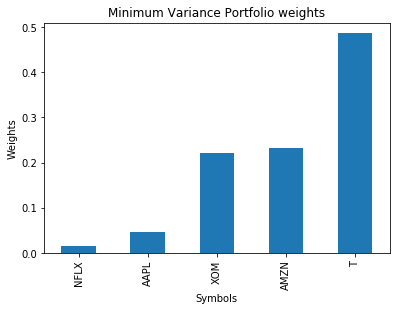

In [29]:
min_var = pd.Series(min_var, index=names)
min_var = min_var.sort_values()
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.set_xlabel('Asset')
ax1.set_ylabel("Weights")
ax1.set_title("Minimum Variance Portfolio weights")
min_var.plot(kind = 'bar')
plt.show()

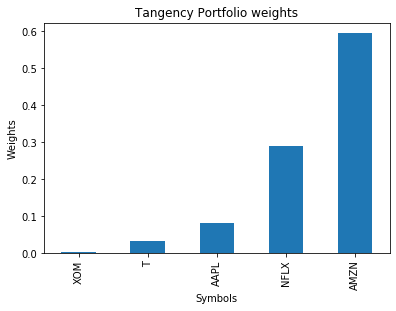

In [30]:
#Next we will visualize the max sharpe ratio portfolio.
max_sr = pd.Series(max_sr, index=names)
max_sr = max_sr.sort_values()
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.set_xlabel('Asset')
ax1.set_ylabel("Weights")
ax1.set_title("Tangency Portfolio weights")
max_sr.plot(kind = 'bar')
plt.show()

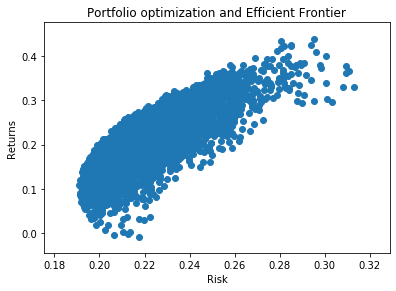

In [31]:
#Finally we can plot all the 5000 portfolios.
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.set_xlabel('Risk')
ax1.set_ylabel("Returns")
ax1.set_title("Portfolio optimization and Efficient Frontier")
plt.scatter(port_risk, port_returns)
plt.show()

In [32]:
#7.7.1 Minimum Variance Portfolio
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
from numpy.linalg import inv,pinv
from scipy.optimize import minimize

# USER INPUT
V = np.matrix('123 37.5 70 30; 37.5 122 72 13.5; 70 72 321 -32; 30 13.5 -32 52')/100  # covariance
R = np.matrix('14; 12; 15; 7')/100
rf = 3/100

w0= [0.25,0.25,0.25,0.25]
# min var optimization
def calculate_portfolio_var(w,V):
    w = np.matrix(w)
    return (w*V*w.T)[0,0]

# unconstrained portfolio (only sum(w) = 1 )
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x)-1.0})
res= minimize(calculate_portfolio_var, w0, args=V, method='SLSQP',constraints=cons)
w_g = res.x
mu_g = w_g*R
var_g = np.dot(w_g*V,w_g)
print(cons,'\n',res,'\n',w_g,'\n',mu_g,'\n',var_g)

{'type': 'eq', 'fun': <function <lambda> at 0x000000001024F048>} 
      fun: 0.34550546629783696
     jac: array([0.69118827, 0.69115803, 0.69099351, 0.69100006])
 message: 'Optimization terminated successfully.'
    nfev: 37
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([-0.03070347,  0.11227772,  0.16431882,  0.75410693]) 
 [-0.03070347  0.11227772  0.16431882  0.75410693] 
 [[0.08661015]] 
 [[0.34550547]]
